# Practica 1 AST

## Importamos las librerias

In [5]:
import pandas as pd
import numpy as np
import wget
import zipfile

import re
import copy
from datetime import datetime as dt

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Descargamos el archivo

In [5]:
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip')

'LD2011_2014.txt.zip'

## Descomprimimos el archivo

In [7]:
with zipfile.ZipFile('LD2011_2014.txt.zip', 'r') as zip_ref:
    zip_ref.extractall('Practica 1/')

## Creamos el dataframe con pandas

In [8]:
dataset = pd.read_table("LD2011_2014.txt", sep =";")

C:\Users\josev\AppData\Local\Temp\ipykernel_20704\1545162066.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_table("LD2011_2014.txt", sep =";")


## Revisamos el dataset

In [9]:
dataset.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


## Comprobar el número de filas y columnas

In [10]:
dataset.shape

(140256, 371)

## Comprobar el tipo de datos para cada número de columnas

In [11]:
for col in dataset.columns:
    print(col, type(dataset[col][0]))

Unnamed: 0 <class 'str'>
MT_001 <class 'int'>
MT_002 <class 'int'>
MT_003 <class 'int'>
MT_004 <class 'int'>
MT_005 <class 'int'>
MT_006 <class 'int'>
MT_007 <class 'int'>
MT_008 <class 'int'>
MT_009 <class 'int'>
MT_010 <class 'int'>
MT_011 <class 'int'>
MT_012 <class 'int'>
MT_013 <class 'int'>
MT_014 <class 'int'>
MT_015 <class 'int'>
MT_016 <class 'int'>
MT_017 <class 'int'>
MT_018 <class 'int'>
MT_019 <class 'int'>
MT_020 <class 'int'>
MT_021 <class 'int'>
MT_022 <class 'int'>
MT_023 <class 'int'>
MT_024 <class 'int'>
MT_025 <class 'int'>
MT_026 <class 'int'>
MT_027 <class 'int'>
MT_028 <class 'int'>
MT_029 <class 'int'>
MT_030 <class 'int'>
MT_031 <class 'int'>
MT_032 <class 'int'>
MT_033 <class 'int'>
MT_034 <class 'int'>
MT_035 <class 'int'>
MT_036 <class 'int'>
MT_037 <class 'int'>
MT_038 <class 'int'>
MT_039 <class 'int'>
MT_040 <class 'int'>
MT_041 <class 'int'>
MT_042 <class 'int'>
MT_043 <class 'int'>
MT_044 <class 'int'>
MT_045 <class 'int'>
MT_046 <class 'int'>
MT_047 <c

### Puede ver que algunos de los tipos de datos son tipos de cadena.
### La razón es que el punto decimal es una coma.
### Convertir "," a "." para cambiar el tipo str a tipo float

In [12]:
dataset = dataset.replace(r",", ".",regex = True)  

# Cambiar el nombre de la columna "Sin nombre: 0" a "time"

dataset.rename(columns = {"Unnamed: 0": "time"}, inplace = True)

In [13]:
# Dado que todo, excepto el tiempo, es de tipo decimal, el tiempo se separa una vez y se cambia a tipo flotante
data = dataset.drop("time", axis = 1) # tratar solo "tiempo" por separado
data = data.astype("float") # Convertir número a tipo flotante

In [14]:
#Convierta a kWh (divida por 4 y corrija a kWh como se describe en la descripción de UCI)

data = data/4

# Dado que los datos originales son datos de clientes corporativos, se dividen por 500 (esto es apropiado) y se convierten en consumo de energía a nivel de hogares individuales.

data = data/500

# finalmente crea una columna de tiempo
data["time"] = dataset["time"]

C:\Users\josev\AppData\Local\Temp\ipykernel_20704\1323961304.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["time"] = dataset["time"]


In [15]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,0.001985,0.010384,0.001459,0.041092,0.018620,0.070614,0.002261,0.095701,0.019988,0.021103,...,0.109107,18.803994,0.943714,1.470016,0.032707,0.004635,0.212131,0.047352,0.312626,4.361178
std,0.002992,0.006636,0.005507,0.029124,0.013231,0.049220,0.003243,0.060991,0.014907,0.016701,...,0.102417,19.345977,0.900743,1.366126,0.032504,0.005008,0.137169,0.040149,0.190328,4.597578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.001422,0.000000,0.018293,0.007927,0.035714,0.000283,0.055556,0.006993,0.004839,...,0.002855,0.000000,0.000000,0.000000,0.006519,0.000000,0.000000,0.015025,0.041972,0.000000
50%,0.000635,0.012447,0.000869,0.043699,0.019512,0.078869,0.001413,0.111111,0.020105,0.020430,...,0.065667,12.050000,0.525316,1.068182,0.015645,0.003511,0.262950,0.038397,0.379032,0.000000
75%,0.001269,0.014936,0.000869,0.057927,0.027439,0.102679,0.002261,0.139731,0.028846,0.030645,...,0.201642,27.400000,1.656118,2.681818,0.054107,0.005851,0.313872,0.075960,0.437683,8.891892
max,0.024112,0.057610,0.075586,0.160569,0.075000,0.267857,0.022329,0.276094,0.078671,0.099462,...,0.426481,96.400000,3.875527,6.193182,0.167536,0.030135,0.569359,0.181135,0.774560,15.459459


In [16]:
data

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,time
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011-01-01 00:15:00
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011-01-01 00:30:00
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011-01-01 00:45:00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011-01-01 01:00:00
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011-01-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,0.001269,0.011024,0.000869,0.075203,0.042683,0.151786,0.005653,0.141414,0.034091,0.036022,...,14.10,0.808017,0.681818,0.014993,0.002926,0.348551,0.088481,0.325513,3.810811,2014-12-31 23:00:00
140252,0.001269,0.010669,0.000869,0.083333,0.040854,0.162202,0.005653,0.126263,0.032343,0.036022,...,14.15,0.784810,0.670455,0.014993,0.004974,0.335821,0.084307,0.334677,3.351351,2014-12-31 23:15:00
140253,0.001269,0.010313,0.000869,0.081301,0.041463,0.159226,0.005088,0.121212,0.030594,0.037097,...,13.90,0.778481,0.659091,0.013690,0.004681,0.335382,0.076795,0.335044,3.432432,2014-12-31 23:30:00
140254,0.000635,0.010669,0.000869,0.083333,0.042683,0.142857,0.005088,0.112795,0.032343,0.036022,...,14.00,0.721519,0.454545,0.013038,0.002048,0.332309,0.073456,0.323314,3.270270,2014-12-31 23:45:00


In [17]:
# Función para extraer el mes, la fecha, el día de la semana y la hora de la columna de tiempo + inserta el año

def get_year_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.year

def get_month_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.month

def get_day_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.day

def get_weekday_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.weekday()

def get_hour_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.hour

In [18]:
# Aplicar por lotes la función creada anteriormente con apply

data["year"] = data["time"].apply(get_year_from_time)
data["month"] = data["time"].apply(get_month_from_time)
data["day"] = data["time"].apply(get_day_from_time)
data["weekday"] = data["time"].apply(get_weekday_from_time)
data["hour"] = data["time"].apply(get_hour_from_time)

C:\Users\josev\AppData\Local\Temp\ipykernel_20704\4114484212.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["year"] = data["time"].apply(get_year_from_time)
C:\Users\josev\AppData\Local\Temp\ipykernel_20704\4114484212.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["month"] = data["time"].apply(get_month_from_time)
C:\Users\josev\AppData\Local\Temp\ipykernel_20704\4114484212.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [19]:
print(data.shape)
data.head()

(140256, 376)


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_367,MT_368,MT_369,MT_370,time,year,month,day,weekday,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 00:15:00,2011,1,1,5,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 00:30:00,2011,1,1,5,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 00:45:00,2011,1,1,5,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 01:00:00,2011,1,1,5,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 01:15:00,2011,1,1,5,1


In [20]:
# Droppeamos tiempo

data = data.drop("time", axis = 1)
print(data.shape)
data.head()

(140256, 375)


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_366,MT_367,MT_368,MT_369,MT_370,year,month,day,weekday,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,1,1,5,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,1,1,5,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,1,1,5,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,1,1,5,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,1,1,5,1


In [31]:
# Resumen por horas
#data2 = pd.DataFrame([0], index = [data.index.shift()[0]])
#data2.append(data).groupby(pd.Grouper(freq = "1H")).aggregate(np.sum)[1:]

In [24]:
# Calcule el total para cada año y determine la fecha de inicio de los datos

data_groupby = data.groupby("year").sum()
data_groupby

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,month,day,weekday,hour
year,,,,,,,,,,,,,,,,,,,,,
2011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,228671,550847,105307,402960
2012,96.565990,471.575036,136.157689,1750.983740,828.568902,3265.602679,84.433861,4463.148148,966.257867,934.682258,...,1776.273794,224.534231,10238.466198,2190.196160,15103.544721,0.000000,228864,553632,105408,404064
2013,110.796954,517.458748,38.546481,1892.281504,871.896341,3372.696429,129.903053,4559.436027,946.699301,1065.438172,...,1354.085398,229.626682,9516.107550,2246.868114,14539.018695,301328.835135,228672,550848,104928,402960
2014,71.098985,467.408250,29.950043,2120.079268,911.081098,3265.555060,102.730356,4399.893939,890.402972,959.607527,...,1456.920469,195.903160,9997.820896,2204.322204,14204.753666,310348.918919,228672,550848,105024,402960
2015,0.001269,0.009957,0.000869,0.089431,0.042073,0.139881,0.005088,0.124579,0.031469,0.034946,...,0.013690,0.002048,0.314311,0.065943,0.336510,3.567568,1,1,3,0


In [25]:
# Extracto de 2012 a 2015

data201215 = data.loc[data.year.isin([2012, 2013, 2014, 2015])]
print(data201215.shape)
data201215.head()

(105217, 375)


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_366,MT_367,MT_368,MT_369,MT_370,year,month,day,weekday,hour
35039,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,2012,1,1,6,0
35040,0.001904,0.01138,0.038662,0.068089,0.035366,0.175595,0.004805,0.139731,0.037587,0.043548,...,0.006437,0.252414,0.031720,0.380865,0.0,2012,1,1,6,0
35041,0.002538,0.01138,0.038662,0.068089,0.036585,0.177083,0.004522,0.139731,0.036713,0.042473,...,0.006729,0.262511,0.030050,0.351173,0.0,2012,1,1,6,0
35042,0.001904,0.01138,0.038662,0.070122,0.034756,0.174107,0.004240,0.139731,0.037587,0.045699,...,0.005266,0.263389,0.028381,0.348240,0.0,2012,1,1,6,0
35043,0.001904,0.01138,0.038662,0.070122,0.037805,0.169643,0.003674,0.139731,0.034091,0.044086,...,0.007314,0.269974,0.031720,0.346774,0.0,2012,1,1,6,1


In [27]:
#eliminar clientes perdidos
data201215c = data201215.drop(columns =["MT_003","MT_040","MT_131","MT_159","MT_223","MT_348"])
print(data201215c.shape)
data201215c.head()

(105217, 369)


,MT_001,MT_002,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,...,MT_366,MT_367,MT_368,MT_369,MT_370,year,month,day,weekday,hour
35039,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,2012,1,1,6,0
35040,0.001904,0.01138,0.068089,0.035366,0.175595,0.004805,0.139731,0.037587,0.043548,0.030179,...,0.006437,0.252414,0.031720,0.380865,0.0,2012,1,1,6,0
35041,0.002538,0.01138,0.068089,0.036585,0.177083,0.004522,0.139731,0.036713,0.042473,0.028689,...,0.006729,0.262511,0.030050,0.351173,0.0,2012,1,1,6,0
35042,0.001904,0.01138,0.070122,0.034756,0.174107,0.004240,0.139731,0.037587,0.045699,0.029806,...,0.005266,0.263389,0.028381,0.348240,0.0,2012,1,1,6,0
35043,0.001904,0.01138,0.070122,0.037805,0.169643,0.003674,0.139731,0.034091,0.044086,0.030924,...,0.007314,0.269974,0.031720,0.346774,0.0,2012,1,1,6,1


In [28]:
# Agrupar por mes

data_groupby_month = data201215c.groupby("month").sum()
data_groupby_month

,MT_001,MT_002,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,...,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,year,day,weekday,hour
month,,,,,,,,,,,,,,,,,,,,,
1,25.927665,120.615220,563.701220,291.322561,1034.199405,19.932165,1205.885522,310.427448,303.562366,227.012668,...,310.082138,55.589233,2212.464442,600.979967,3473.601173,40667.854054,17974079,142849,26307,102672
2,21.263325,108.146515,527.458333,258.032927,933.238095,17.733748,1067.469697,258.810315,250.161828,200.870343,...,306.602999,48.988005,2272.658911,541.065943,3153.133065,36230.924324,16425984,119712,24384,93840
3,24.885152,114.590327,494.112805,229.902439,858.165179,17.913793,1093.427609,223.855769,244.805914,176.742176,...,330.621252,53.108836,2497.607989,541.656093,3543.118402,43838.745946,17972064,142848,27840,102672
4,18.696066,103.764580,445.162602,195.753049,744.297619,15.172979,1023.740741,195.471154,231.865054,154.720566,...,320.365711,45.625219,2457.257682,512.528381,3423.239003,50015.827027,17392320,133920,25152,99360
5,26.098985,122.139403,431.830285,166.357317,728.559524,13.391181,1048.050505,181.276224,226.531720,147.480253,...,367.637549,46.340843,2611.799824,538.200334,3626.575513,58534.659459,17972064,142848,26784,102672
6,14.901650,126.230797,418.396341,158.312805,702.522321,12.646976,1060.015152,181.813811,183.205376,143.995902,...,410.102999,61.646870,2572.666813,524.253756,3768.282991,59631.778378,17392320,133920,26688,99360
7,13.186548,147.442745,456.513211,215.626220,761.580357,77.500283,1167.415825,221.443182,242.690323,168.273845,...,499.911343,65.974839,2831.212028,567.912354,4273.965543,60815.351351,17972064,142848,25728,102672
8,35.644036,142.721550,450.103659,188.059756,722.293155,67.890334,1171.488215,202.569930,201.363978,163.574888,...,454.506519,61.421006,2800.646620,564.083472,4280.457478,61137.362162,17972064,142848,27648,102672
9,35.027284,122.403983,434.605691,177.024390,733.441964,22.040984,1108.348485,237.746503,219.791935,154.168033,...,483.331812,56.849035,2604.030290,543.304674,3951.908358,56880.337838,17392320,133920,25920,99360


In [29]:
#cada 15m -> cada hora
data201215h = data201215c.groupby(["hour"], as_index =  False).sum().drop(columns = ["year","month","day","weekday"])
print(data201215h.shape)
data201215h.head()

(24, 365)


,hour,MT_001,MT_002,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,0,10.533629,54.263514,256.016260,122.142073,384.834821,14.814585,509.503367,109.514860,110.998925,...,229.777302,69554.05,2489.909283,3699.647727,69.741199,36.267993,1431.021949,330.225376,1793.542155,25548.167568
1,1,10.924492,48.672831,217.777439,107.418902,326.818452,13.487564,453.690236,99.902098,102.422043,...,182.802641,44648.20,1797.149789,3032.534091,60.829857,33.406671,1364.953029,289.555092,1740.795088,25634.972973
2,2,10.679569,46.184566,196.214431,98.545122,293.915179,12.950537,414.521886,94.124126,97.078495,...,161.139543,40231.90,1679.841772,2876.920455,59.149935,26.452896,1282.295435,227.409015,1698.599340,25594.789189
3,3,10.798858,45.697724,184.377033,94.929878,272.842262,12.603166,438.361953,90.412587,92.980645,...,142.726624,36637.00,1598.200422,2779.068182,57.758149,21.301346,1151.536874,191.843072,1641.625000,25337.897297
4,4,10.876904,46.203770,175.701220,91.985366,259.553571,12.452798,424.446128,88.282343,91.279032,...,150.838687,31618.60,1558.668776,2722.329545,56.876793,18.620246,1088.946444,167.393155,1604.954545,25179.200000


In [30]:
## Solo de 8:00 a 20:00

data88 = data201215c.loc[data201215c.hour == 8]
print(data88.shape)
data88.head()

(4384, 369)


,MT_001,MT_002,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,...,MT_366,MT_367,MT_368,MT_369,MT_370,year,month,day,weekday,hour
35071,0.001904,0.010669,0.027439,0.017683,0.061012,0.001413,0.065657,0.021853,0.018280,0.014531,...,0.006437,0.155399,0.022538,0.326613,0.0,2012,1,1,6,8
35072,0.001269,0.011024,0.031504,0.016463,0.065476,0.001413,0.065657,0.021853,0.019892,0.014158,...,0.004096,0.154522,0.025876,0.348607,0.0,2012,1,1,6,8
35073,0.001904,0.011024,0.033537,0.017073,0.077381,0.001696,0.062290,0.021853,0.019892,0.016393,...,0.004096,0.169447,0.026711,0.332111,0.0,2012,1,1,6,8
35074,0.000635,0.011024,0.035569,0.019512,0.071429,0.001696,0.065657,0.026224,0.020968,0.016021,...,0.004096,0.150132,0.025876,0.331378,0.0,2012,1,1,6,8
35167,0.001269,0.013869,0.043699,0.020122,0.093750,0.001131,0.109428,0.036713,0.020968,0.013785,...,0.009655,0.186567,0.070952,0.392595,0.0,2012,1,2,0,8


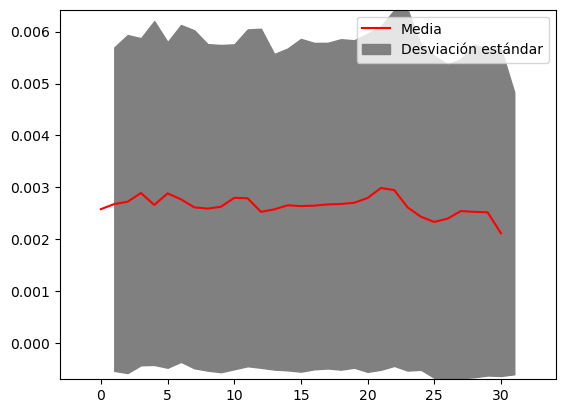

In [83]:
# Plot the average consumption per day along with the standard deviation

# Average consuption per day 

AvgPerDay = data201215c.groupby(["day"], as_index =  False).mean().drop(columns = ["year","month","hour","weekday"])

# Standard deviation per day

StdPerDay = data201215c.groupby(["day"], as_index =  False).std().drop(columns = ["year","month","hour","weekday"])

# Plot the average consumption per day along with the standard deviation

plt.plot(AvgPerDay.iloc[:,1], label = "Media", color = "red")
plt.fill_between(StdPerDay.iloc[:,0], AvgPerDay.iloc[:,1] - StdPerDay.iloc[:,1], AvgPerDay.iloc[:,1] + StdPerDay.iloc[:,1], color = "grey", label = "Desviación estándar")
plt.legend()
plt.margins(x = 0.1, y = 0)
plt.show()


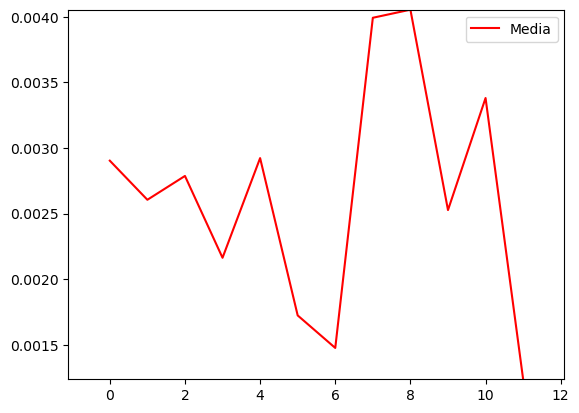

In [84]:
# Plot the average consuption per day

# Average consuption per month

AvgPerMonth = data201215c.groupby(["month"], as_index =  False).mean().drop(columns = ["year","day","hour","weekday"])

# Plot the average consuption per month

plt.plot(AvgPerMonth.iloc[:,1], label = "Media", color = "red")
plt.legend()
plt.margins(x = 0.1, y = 0)

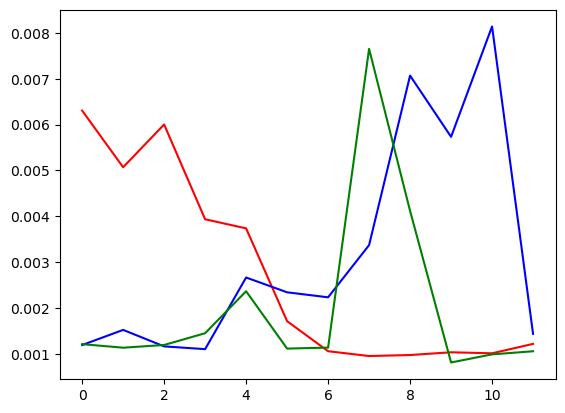

In [85]:
# Plot the average for 2012, 2013, 2014 in the same plot

# Average consuption 2012

AvgPerYear2012 = data201215c.loc[data201215c.year == 2012].groupby(["month"], as_index =  False).mean().drop(columns = ["year","day","hour","weekday"])

# Average consuption 2013

AvgPerYear2013 = data201215c.loc[data201215c.year == 2013].groupby(["month"], as_index =  False).mean().drop(columns = ["year","day","hour","weekday"])

# Average consuption 2014

AvgPerYear2014 = data201215c.loc[data201215c.year == 2014].groupby(["month"], as_index =  False).mean().drop(columns = ["year","day","hour","weekday"])

# Plot the average for 2012, 2013, 2014 in the same plot

plt.plot(AvgPerYear2012.iloc[:,1], label = "2012", color = "red")
plt.plot(AvgPerYear2013.iloc[:,1], label = "2013", color = "blue")
plt.plot(AvgPerYear2014.iloc[:,1], label = "2014", color = "green")
